In [28]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the Excel file to inspect the contents and see the available sheets
file_path = 'Data Pro.XLSX'
xls = pd.ExcelFile(file_path)
# Display sheet names to understand the structure of the file
xls.sheet_names

['Suppliers',
 'Shippers',
 'Products',
 'Orders',
 'OrderDetails',
 'Employees',
 'Customers',
 'Categories']

In [2]:
# Load the necessary sheets for analysis

suppliers_df = pd.read_excel(xls, 'Suppliers')

shippers_df = pd.read_excel(xls, 'Shippers')

products_df = pd.read_excel(xls, 'Products')

orders_df = pd.read_excel(xls, 'Orders')

order_details_df = pd.read_excel(xls, 'OrderDetails')

employees_df = pd.read_excel(xls, 'Employees')

customers_df = pd.read_excel(xls, 'Customers')

categories_df = pd.read_excel(xls, 'Categories')



# Preview the loaded data to understand its structure

suppliers_df.head(), shippers_df.head(), products_df.head(), orders_df.head(), order_details_df.head(), employees_df.head(), customers_df.head(), categories_df.head()

(   SupplierID                        SupplierName                 ContactName  \
 0           1                       Exotic Liquid            Charlotte Cooper   
 1           2          New Orleans Cajun Delights               Shelley Burke   
 2           3           Grandma Kelly's Homestead               Regina Murphy   
 3           4                       Tokyo Traders                Yoshi Nagase   
 4           5  Cooperativa de Quesos 'Las Cabras'  Antonio del Valle Saavedra   
 
                      Address         City PostalCode Country           Phone  
 0             49 Gilbert St.      Londona    EC1 4SD      UK  (171) 555-2222  
 1             P.O. Box 78934  New Orleans      70117     USA  (100) 555-4822  
 2             707 Oxford Rd.    Ann Arbor      48104     USA  (313) 555-5735  
 3  9-8 Sekimai Musashino-shi        Tokyo        100   Japan  (03) 3555-5011  
 4          Calle del Rosal 4       Oviedo      33007   Spain  (98) 598 76 54  ,
    ShipperID       Shipp

In [3]:
# Merging relevant data for analysis
# Joining OrderDetails with Products and Categories to get product details and category info
order_details_merged_df = pd.merge(order_details_df, products_df, on='ProductID')
order_details_merged_df = pd.merge(order_details_merged_df, categories_df, on='CategoryID')

# Joining with Orders to get customer and shipping details
order_details_merged_df = pd.merge(order_details_merged_df, orders_df, on='OrderID')

# Joining with Customers to get customer details
order_details_merged_df = pd.merge(order_details_merged_df, customers_df, on='CustomerID')

# Joining with Employees to get employee details
order_details_merged_df = pd.merge(order_details_merged_df, employees_df, on='EmployeeID')

# Calculating Total Revenue (Price * Quantity) for each order detail
order_details_merged_df['TotalRevenue'] = order_details_merged_df['Price'] * order_details_merged_df['Quantity']

# Preview the cleaned and merged dataframe
order_details_merged_df.head()


,OrderDetailID,OrderID,ProductID,Quantity,Returned,ProductName,SupplierID,CategoryID,Unit,Price,...,Address,City,PostalCode,Country,LastName,FirstName,BirthDate,Photo,Notes,TotalRevenue
0,1,10248,11,12,NaN,Queso Cabrales,5,4,1 kg pkg.,21,...,Keskuskatu 45,Helsinki,21240,Finland,Buchanan,Steven,1955-03-04,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...,252
1,2,10248,42,10,NaN,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14,...,Keskuskatu 45,Helsinki,21240,Finland,Buchanan,Steven,1955-03-04,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...,140
2,3,10248,72,5,NaN,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,35,...,Keskuskatu 45,Helsinki,21240,Finland,Buchanan,Steven,1955-03-04,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...,175
3,4,10249,14,9,NaN,Tofu,6,7,40 - 100 g pkgs.,23,...,"Av. In?s de Castro, 414",S?o Paulo,05634-030,Brazil,Suyama,Michael,1963-07-02,EmpID6.pic,Michael is a graduate of Sussex University (MA...,207
4,5,10249,51,40,NaN,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53,...,"Av. In?s de Castro, 414",S?o Paulo,05634-030,Brazil,Suyama,Michael,1963-07-02,EmpID6.pic,Michael is a graduate of Sussex University (MA...,2120


In [4]:
# 1-Calculating the total revenue from all orders
total_revenue = order_details_merged_df['TotalRevenue'].sum()
total_revenue

387066

In [5]:
#2- Total Number of Orders
total_orders = orders_df['OrderID'].nunique()
print("Total Number of Orders: ", total_orders)


Total Number of Orders:  196


In [6]:
# 3-Number of Unique Customers
# Number of Unique Customers who placed orders
unique_customers = order_details_merged_df['CustomerID'].nunique()
print("Number of Unique Customers: ", unique_customers)


Number of Unique Customers:  74


In [7]:
# 4-Best-Selling 5 Products
# Best-Selling 5 Products by Total Revenue (Price * Quantity)
best_selling_products = order_details_merged_df.groupby('ProductName')['TotalRevenue'].sum().nlargest(5)
print("Best-Selling 5 Products by Revenue:\n", best_selling_products)



Best-Selling 5 Products by Revenue:
 ProductName
C?te de Blaye              63096
Th?ringer Rostbratwurst    20832
Raclette Courdavault       19030
Tarte au sucre             15925
Camembert Pierrot          14620
Name: TotalRevenue, dtype: int64


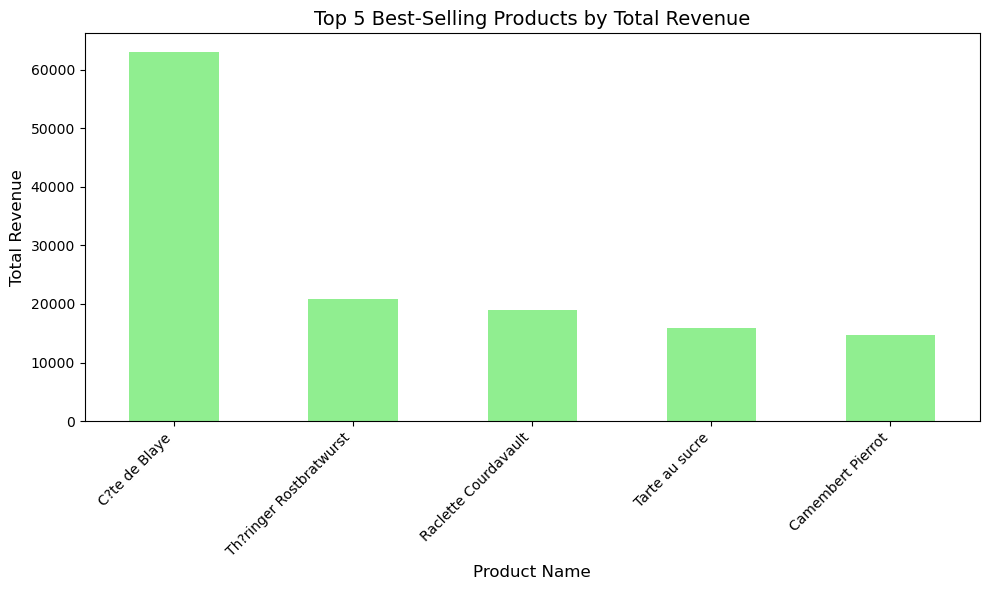

In [29]:
# Plotting the Best-Selling 5 Products by Total Revenue
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar', color='lightgreen')

# Adding title and axis labels
plt.title('Top 5 Best-Selling Products by Total Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotating product names for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
#5- Total Revenue by Category
revenue_by_category = order_details_merged_df.groupby('CategoryName')['TotalRevenue'].sum()
print("Total Revenue by Category:\n", revenue_by_category)


Total Revenue by Category:
 CategoryName
Beverages         99699
Condiments        35024
Confections       54729
Dairy Products    70530
Grains/Cereals    22370
Meat/Poultry      51636
Produce           23439
Seafood           29639
Name: TotalRevenue, dtype: int64


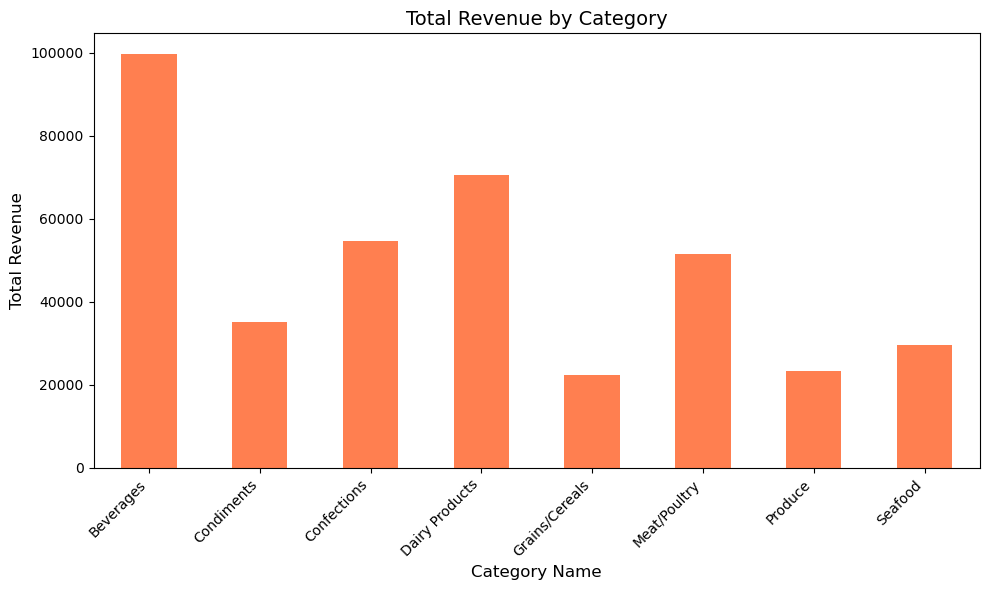

In [30]:
# Plotting the Total Revenue by Category
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='coral')

# Adding title and axis labels
plt.title('Total Revenue by Category', fontsize=14)
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotating category names for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
# 6-Customer Distribution by Country
customer_distribution = customers_df['Country'].value_counts()
print("Customer Distribution by Country:\n", customer_distribution)


Customer Distribution by Country:
 Country
USA            13
Germany        11
France         11
Brazil          9
UK              7
Spain           5
Mexico          5
Venezuela       4
Canada          3
Argentina       3
Italy           3
Finland         2
Denmark         2
Belgium         2
Austria         2
Portugal        2
Switzerland     2
Sweden          2
Ireland         1
Norway          1
Poland          1
Name: count, dtype: int64


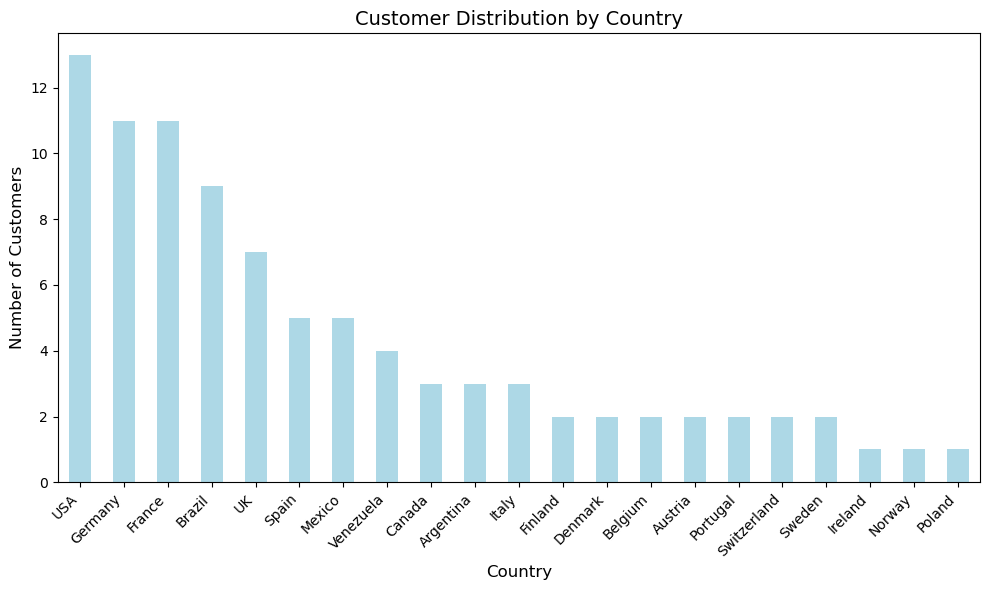

In [31]:
# Plotting Customer Distribution by Country
plt.figure(figsize=(10, 6))
customer_distribution.plot(kind='bar', color='lightblue')

# Adding title and axis labels
plt.title('Customer Distribution by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Rotating country names for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
# 7-Total Sales by Country (Revenue across different countries)
sales_by_country = order_details_merged_df.groupby('Country')['TotalRevenue'].sum()
print("Total Sales by Country:\n", sales_by_country)


Total Sales by Country:
 Country
Argentina        396
Austria        51687
Belgium         8075
Brazil         40272
Canada         31402
Denmark        17954
Finland         6478
France         29559
Germany        47316
Ireland        15405
Italy           4339
Mexico          5882
Norway          1341
Poland           585
Portugal        4169
Spain           4316
Sweden          9736
Switzerland     8109
UK             16764
USA            69722
Venezuela      13559
Name: TotalRevenue, dtype: int64


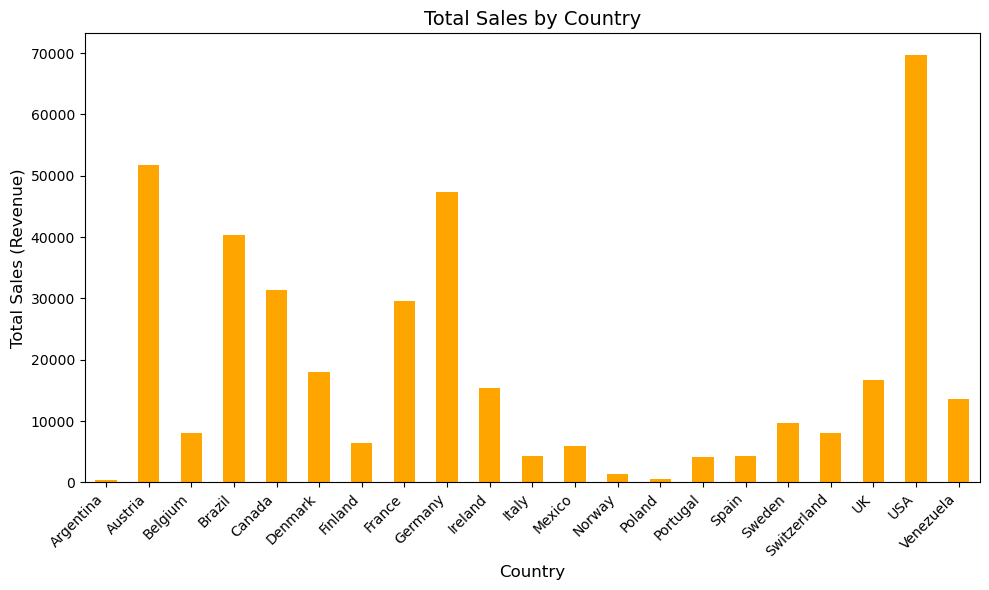

In [32]:
# Plotting Total Sales by Country
plt.figure(figsize=(10, 6))
sales_by_country.plot(kind='bar', color='orange')

# Adding title and axis labels
plt.title('Total Sales by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales (Revenue)', fontsize=12)

# Rotating country names for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [11]:
# 8-Total Number of Suppliers
total_suppliers = suppliers_df['SupplierID'].nunique()
print("Total Suppliers: ", total_suppliers)


Total Suppliers:  29


In [12]:
# 9-Top 3 Employees by Sales
top_employees = order_details_merged_df.groupby(['EmployeeID', 'LastName', 'FirstName'])['TotalRevenue'].sum().nlargest(3)
print("Top 3 Employees by Sales:\n", top_employees)


Top 3 Employees by Sales:
 EmployeeID  LastName   FirstName
4           Peacock    Margaret     105926
1           Davolio    Nancy         57765
3           Leverling  Janet         42823
Name: TotalRevenue, dtype: int64


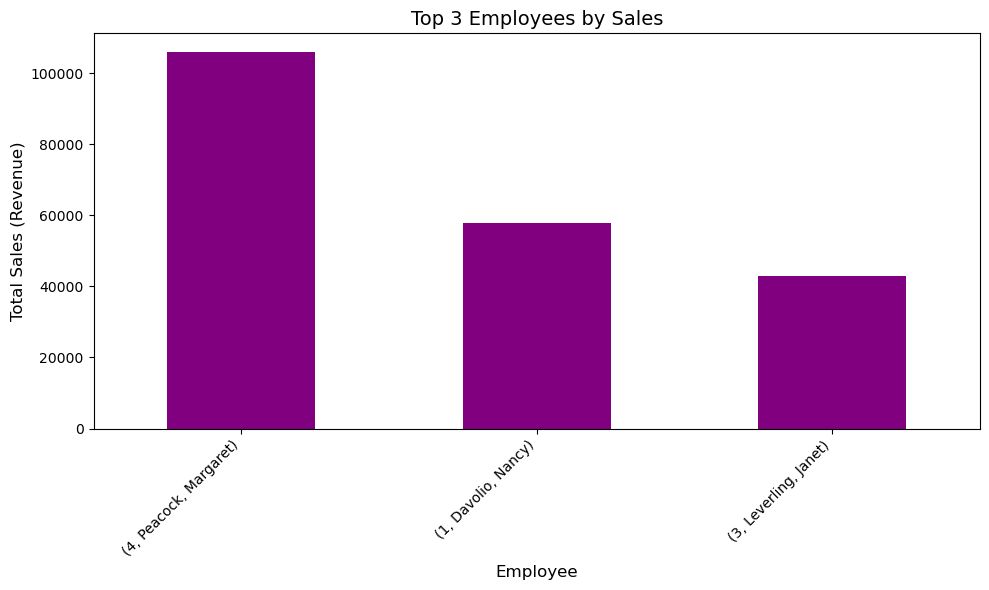

In [33]:
# Plotting Top 3 Employees by Sales
plt.figure(figsize=(10, 6))
top_employees.plot(kind='bar', color='purple')

# Adding title and axis labels
plt.title('Top 3 Employees by Sales', fontsize=14)
plt.xlabel('Employee', fontsize=12)
plt.ylabel('Total Sales (Revenue)', fontsize=12)

# Rotating employee names for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

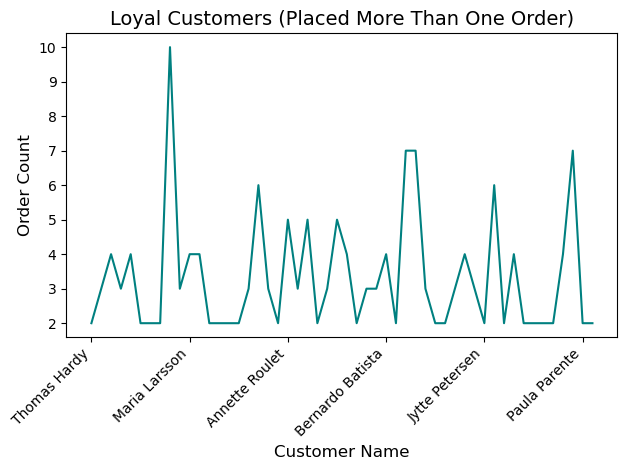

In [36]:
# Plotting Loyal Customers (Customers with more than one order)
plt.figure(figsize=(10, 6))
loyal_customers_with_names.plot(kind='line', x='CustomerName', y='OrderCount', color='teal', legend=False)

# Adding title and axis labels
plt.title('Loyal Customers (Placed More Than One Order)', fontsize=14)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

# Rotating customer names for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()




In [14]:
# 11-Total Quantity Sold by Category
quantity_by_category = order_details_merged_df.groupby('CategoryName')['Quantity'].sum()
print("Total Quantity Sold by Category:\n", quantity_by_category)


Total Quantity Sold by Category:
 CategoryName
Beverages         2289
Condiments        1383
Confections       2110
Dairy Products    2601
Grains/Cereals     912
Meat/Poultry      1288
Produce            715
Seafood           1445
Name: Quantity, dtype: int64


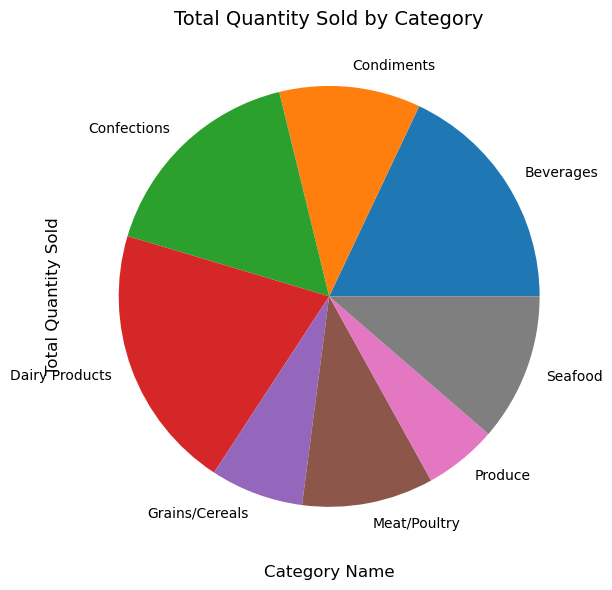

In [38]:
# Plotting Total Quantity Sold by Category
plt.figure(figsize=(10, 6))
quantity_by_category.plot(kind='pie', color='dodgerblue')

# Adding title and axis labels
plt.title('Total Quantity Sold by Category', fontsize=14)
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)

# Rotating category names for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [20]:
# 12-Orders Shipped by Each Shipper
# Count of orders shipped by each shipper (with Shipper Name)
orders_by_shipper = orders_df.groupby('ShipperID')['OrderID'].count()

# Merge with shipper names from the Shippers dataframe
orders_by_shipper_with_names = pd.merge(orders_by_shipper, shippers_df[['ShipperID', 'ShipperName']], on='ShipperID')

# Rename columns for clarity
orders_by_shipper_with_names.columns = ['ShipperID', 'OrderCount', 'ShipperName']

# Display the results
df_group=print(orders_by_shipper_with_names[['ShipperName', 'OrderCount']])



        ShipperName  OrderCount
0    Speedy Express          54
1    United Package          74
2  Federal Shipping          68


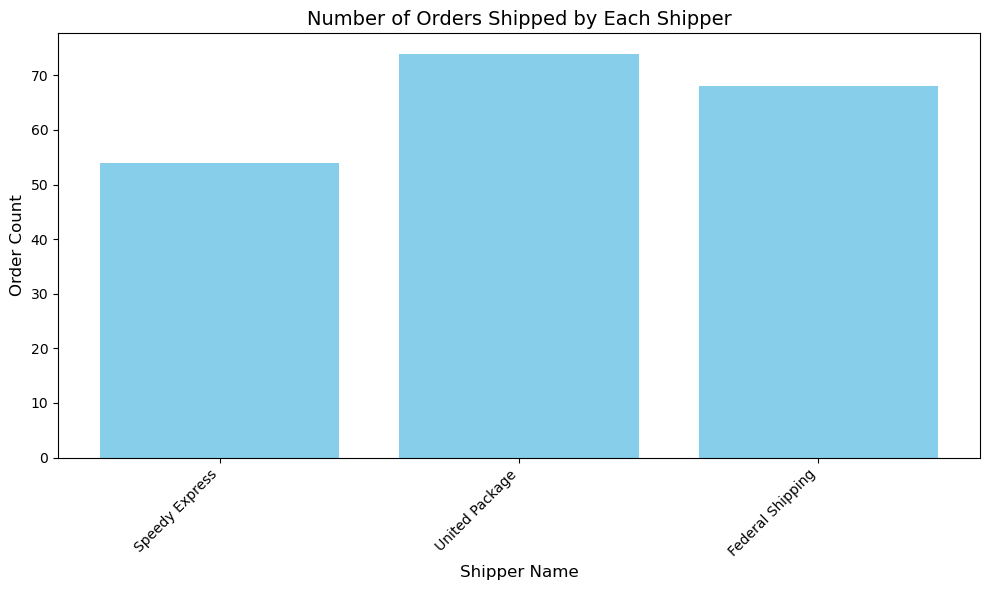

In [42]:
# Plotting the number of orders shipped by each shipper
plt.figure(figsize=(10, 6))
plt.bar(orders_by_shipper_with_names['ShipperName'], orders_by_shipper_with_names['OrderCount'], color='skyblue')
# Adding title and axis labels
plt.title('Number of Orders Shipped by Each Shipper', fontsize=14)
plt.xlabel('Shipper Name', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

# Rotating shipper names for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()
